# MGSC 404 Foundations of Decision Analytics 

# Case Study Worksheet

### Nicholas Tariro Toronga and Sean Mitro

If you use this Jupyter Notebook worksheet to integate your answers with your codes, it's helpful to check out [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) for Markdown formatting.


In [1]:
from gurobipy import *
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math

## Question 1

**Assumptions**

Our model relies on the following assumptions:

1. American System Offices has 8-hour shifts. This is relevant for our production capacity constraint, which depends on the amount of weekly hours worked. 
2. We assume exactly 20 days of production per month, with the rest allocated to maintenance and repairs (as stated in the text). 
3. Production is going to increase by 10% by the beginning of Q4 since the production facility will be 100% functional. 
4. The warehouse across the street is already owned by American System Offices so it does not entail a cost, and moreover, does not constitute any additional cost butthe inventory holding costs as stated in Garcia's inventory model. 
5. The 1996 demand constraints are based on the 1996 sales forecasts, not the number of sales made in 1995. The reason for this is that American Office System sales forecasts are projected to continue to follow an increasing sales trend. 
6. The 750,000 dollar credit line secured by JT Howell is allocated toward production, advertisement and inventory spendings, whereas the intial 90% of the 15 million dollar loan was allocated toward building the facilities completely. 
7. Since the building is 90% complete, we assume 90% of the 15 million dollars was used for the building, leaving an additional 1.5 million dollars available to the different expenses. 
8. Given that the opening inventories of 10,000 IBM and 5,000 Mac adapters are more than the expected sales for a couple of subsequent quarters, we assume that the company will not produce anything in those quarters. 
9. We assume that we will be receiving interest payments from the excess cash invested in Treasury Bills as of the second quarter of 1996. 
10. We assume a straight line model of depreciation for all materials assets in the company. 
11. Since production and sales began in 1995, we assume that Dr. Miller secured a long-term loan for the 750,000 dollars. Accordingly, in order to smooth out consumption (i.e. for example, ad spending will need to be higher at the introduction of the product's lifetime), loan payments will start to be repaid in later periods outside of the scope of this one-year model. 
12. For accuracy's sake, we calculate our cash flow constraints using the actual sales per quarter ($S_i^B$) and ($S_i^A$), not the expected 1996 sales. This is so that our cash flows are not hypothetical, but realistic to the possible irregularities of the market. 
13. We are writing off the remaining 2% and 4% that is sold to the collection agency of the product for IBM and Mac adapters, respectively, at the end of a three-quarter cycle. 
14. We assume that the adapters are the only products which American Office Systems sell. 

**Decision Variables**

We define the following decision variables:

1. $Pb_i$ = Number of IBM adapters [in units] produced in quarter $i, i=1,2,3,4$
2. $Pa_i$ = Number of Apple adapters [in units] produced in quarter $i, i=1,2,3,4$ 
3. $Adb_i$ = Amount of advertising expense [in dollars] spent on IBM in quarter $i, i=1,2,3,4$
4. $Ada_i$ = Amount of advertising expense [in dollars] spent on Apple in quarter $i, i=1,2,3,4$ <br><br>

Adapter production and advertising are the two drivers of both revenue and cost. As production increases, variable costs will rise, as will carrying costs. However, more inventory on hand could result in more revenue if the units are sold. Further, advertising is a main driver of cost, but is also a source if increased revenue as every $10 of advertising expense results in an additional sale. Advertising is the only way that AOS can exceed its projected sales targets, increasing its revenue.

**Parameters**

Inventory is an important parameter because it will influence the quantity of adapters that can be sold, the carrying cost of inventory, and also must satisfy the minimum inventory levels outlined in the case.

5. $Inb_i$ = Number of IBM adapters in inventory in quarter $i, i=1,2,3,4$
6. $Ina_i$ = Number of Apple adapters in inventory in quarter $i, i=1,2,3,4$

Cash collection must be tracked as it influences the amount of adapters we can afford to produce, how much advertising expense we can incur, and the carrying cost of inventory. Further, it will influence how much we must draw on loans to finance our operation. Cash collection will be a function of the sales made in the current quarter and past quarters, as not all cash is collected up front.

7. $Cb_i$ = Number of dollars collected on IBM $i, i = 1, 2, 3, 4$
8. $Ca_i$ = Number of dollars collected on Mac $i, i = 1, 2, 3, 4$

Sales are a key component of cash collection, and the main driver of revenue. Sales are a function of the number of adapters we have available for sale, the amount of advertising expense incurred, and demand from the market.

9. $Sb_i$ = Number of IBM adapters sold in quarter $i, i=1,2,3,4$
10. $Sa_i$ = Number of Apple adapters sold in quarter $i, i=1,2,3,4$

The company has access to a 750,000 dollar line of credit, with 16% annual interest. The utilization of this line of credit must be tracked to ensure accurate accounting of interest charges and so we can be sure that we are not overdrawing the loan.

11. $L_i$ = loan secured (i.e. 750,000 dollar one at the beginning of Q1) 

Cash Flow: The cash flow parameter tracks the total cash flow per quarter. This parameter is a function of the cash collections resulting from sales, less all expenses related to production and operation of the company. 

10. $C_i$ = Cash flow for quarter $i, i = 1, 2, 3, 4$


**Objective Function**

$$\max z = \sum_{i\in\{1,2,3,4\}}\bigg(Cb_i + Ca_i\bigg) - \sum_{i\in\{1,2,3,4\}}\bigg(Adb_i + Ada_i\bigg) - (0.01)(4)\sum_{i\in\{1,2,3,4\}}\bigg(Inhb_i + Inha_i\bigg) - \sum_{i\in\{1,2,3,4\}}\bigg(100Pb_i + 110Pa_i \bigg)(4)(3100000)$$  

American Office Systems has existed for 60 years, albeit having a lack of brand recognition. This means that they will want to pursue a growth strategy geared toward product development: that enables them to be proactive and be able to both produce and market their promising product comfortably. For this reason, their business model should seek to maximize profit, as oppose to minimize cost. The set of variables which control the value of the objective function we are proposing are the cash collected from both the IBM and the Mac adapters, along with the production, advertisement, and inventory holding costs from producing and marketing these. Moreover, we include the fixed operating expense of $3,100,000 per quarter, though we recognize that this constant will not influence the optimal quantities of our control (and our state) variables. 

**Constraints** <br>
Production Capacity <br>
The factory can only produce a limited number of adapters per quarter. A final number is calculated by multiplying the number of adapters produced an hour (30 for IBM, 10 for Mac) by hours in a shift (8) by the number of shifts per day (2) by the number of production days in a month (20) by the number of months in a quarter (3). Q4 has an additional 10 % capacity boost due to the plant expansion finishing.<br>

 $Pb_1$ $\leq$ 28,800 <br>
 $Pb_2$ $\leq$ 28,800 <br>
 $Pb_3$ $\leq$ 28,800 <br>
 $Pb_4$ $\leq$ 31,680 <br>

 $Pa_1$ $\leq$ 9,600 <br>
 $Pa_2$ $\leq$ 9,600 <br>
 $Pa_3$ $\leq$ 9,600 <br>
 $Pa_4$ $\leq$ 10,560 <br>

Demand Constraints <br>
The company has demand constraints based on their forecasts. However, since advertising can boost sales beyond the sales forecasts by one unit for every \$10 spent, we adjusted the constraints to include this additional variable.<br>

 $Sb_1$ $\leq$ 9,000 + $\frac{Adb_1}{10}$ <br>
 $Sb_2$ $\leq$ 10,000 + $\frac{Adb_2}{10}$<br>
 $Sb_3$ $\leq$ 11,000 + $\frac{Adb_3}{10}$<br>
 $Sb_4$ $\leq$ 12,000 + $\frac{Adb_4}{10}$<br>
 
 $Sa_1$ $\leq$ 1,800 + $\frac{Ada_1}{10}$ <br>
 $Sa_2$ $\leq$ 2,000 + $\frac{Ada_2}{10}$<br>
 $Sa_3$ $\leq$ 2,200 + $\frac{Ada_3}{10}$<br>
 $Sa_4$ $\leq$ 2,400 + $\frac{Ada_4}{10}$<br>
 
<br>
Inventory Constraints <br>
There are two main constraints for inventory. Firstly, a constraint needs to calculate the level of inventory after production and and sales occur. In Q1, we must add the starting inventory to this number. Subsequently, the final inventory number will be the sum of the previous quarter's ending inventory plus the production in the current quarter minus the sales in the current quarter.

Inventory After Production IBM <br> 
 $Inb_1$ = 10,000 + $Pb_1$ - $Sb_1$ <br>
 $Inb_2$ = $Inb_1$ + $Pb_2$ - $Sb_2$<br>
 $Inb_3$ = $Inb_2$ + $Pb_3$ - $Sb_3$ <br>
 $Inb_4$ = $Inb_3$ - $Pb_4$ - $Sb_4$ <br>

 Inventory After Production Apple<br>
 $Ina_1$ =  5,000 + $Pa_1$ - $Sa_1$<br>
 $Ina_2$ = $Ina_1$ + $Pa_2$ - $Sa_2$<br>
 $Ina_3$ = $Ina_2$ + $Pa_3$ - $Sa_3$ <br>
 $Ina_4$ = $Ina_3$ + $Pa_4$ -  $Sa_4$<br>
 
 Interest from investing excess cash will earn 6 percent interest. <br>
 
 Interest from Treasury Bills: <br> 
 $I_1$ = 0
 $I_2$ = $C_1$(0.06)
 $I_3$ = $C_2$(0.06)
 $I_4$ = $C_3$(0.06)
 
Cash Collection Constraints<br>
The cash collection constraint is one of the more difficult to conceptualize. Both IBM and Mac adapters have a separate collection schedule corresponding to what percentage of current sales will be collected in a given quarter. In every quarter, we will be collecting cash payments from sales made both that quarter and the previous three quarters. For Q1 and Q2 of 1996, we must also consider the cash payments outstanding from Q3 and Q4 of 1995, and add those to the constraint.

 $C_1$ = 1500000 + $L_1$ + (175)$Sb_1$(0.75) + (8000)(0.2)(175) + (7000)(0.03)(175) + (7000)(0.02)($\frac{175}{2}$) + (0.8)(200)$Sa_1$ + (1600)(200)(0.11) + (1400)(200)(0.05) + (0.04)(1400)($\frac{200}{2}$) - 100 $Pb_1$ - 110 $Pa_1$ - $Adb_1$ - $Ada_1$ - (0.03)(100)($Inb_1$ + $Ina_1$) - 3000000 <br> 
 
 $C_2$ = 1.015($C_1$) + (175)$Sb_2$(0.75) + (175)$Sb_1$(0.2) + (8000)(0.03)(175) +  (8000)(0.02)($\frac{175}{2}$) + (0.8)(200)$Sa_2$ + (0.11)(200)$Sa_1$ + (1600)(200)(0.05)+ (0.04)(1600)($\frac{200}{2}$) - 100 $Pb_2$ - 110 $Pa_2$ - $Adb_2$ - $Ada_2$ - (0.03)(100)($Inb_2$ + $Ina_2$) - $I_1$  - 3000000 <br> 
  
 $C_3$ = 1.015($C_2$)+(175)$Sb_3$(0.75) + (175)$Sb_2$(0.2) + (175)$Sb_1$(0.03) +  (0.02)$Sb_1$($\frac{175}{2}$) + (0.8)(200)$Sa_3$ + (0.11)(200)$Sa_2$ + (0.05)(200)$Sa_3$+ (0.04)$Sa_1$($\frac{200}{2}$)- 100 $Pb_3$ - 110 $Pa_3$ - $Adb_3$ - $Ada_3$ - (0.03)(100)($Inb_3$ + $Ina_3$) - $I_2$  - 3000000 <br> 
  
 $C_4$ = 1.015($C_3$)+(175)$Sb_4$(0.75) + (175)$Sb_3$(0.2) + (175)$Sb_2$(0.03) +  (0.02)$Sb_2$($\frac{175}{2}$) + (0.8)(200)$Sa_4$ + (0.11)(200)$Sa_3$ + (0.05)(200)$Sa_2$+ (0.04)$Sa_2$($\frac{200}{2}$)- 100 $Pb_4$ - 110 $Pa_4$ - $Adb_4$ - $Ada_4$ - (0.03)(100)($Inb_4$ + $Ina_4$) - $I_3$  - 3000000 <br> 

In [2]:
Pb = {} # production of IBM adapters
Pa = {} # production of Mac adapters 

Sb = {} # unit sales of IBM adapters
Sa = {} # unit sales of Mac adapters

Adb = {} # money spent on advertisement for IBM adapters
Ada = {} # money spent on advertisement for Mac adapters

Inb = {} # Inventory of IBM adapters at the end of the quarter 
Ina = {} # Inventory of Mac adapters at the end of the quarter 

Inhb = {} #Inventory holding costs for IBM adapter
Inha = {} #Inventory holding costs for Mac adapter

Cb = {} ## dollars collected IBM
Ca = {} ## dollars collected Mac

I = {} # interest earned of investing extra cash
C = {} # cash flow
L = {} #loan
loan_rate = {} #interest payments
model = Model('American Office Systems Case Study')

for i in range(4):
    Pb[i]  = model.addVar(lb=0)
    Pa[i]  = model.addVar(lb=0)
    Sb[i]  = model.addVar(lb=0)
    Sa[i]  = model.addVar(lb=0)
    Adb[i] = model.addVar(lb=0)
    Ada[i] = model.addVar(lb=0)
    Inb[i] = model.addVar(lb=0)
    Ina[i] = model.addVar(lb=0)
    Inhb[i]= model.addVar(lb=0)
    Inha[i]= model.addVar(lb=0)
    Cb[i]  = model.addVar(lb=0)
    Ca[i]  = model.addVar(lb=0)
    I[i]   = model.addVar(lb=0)
    C[i]   = model.addVar(lb=0)
  

Academic license - for non-commercial use only


In [3]:
price_ibm = 175 #revenue from selling one unit of an IBM adapter. 
price_mac = 200 #revenue from selling one unit of a Mac adapter. 
cost_ibm = 100 #cost to produce a unit of the IBM adapter.
cost_mac = 110 #cost to produce a unit of the Mac adapter. 
per_sale = 10 #dollar amount of advertisement needed to make a single sale
loan_rate = 0.16
ibm_forecast = [9000, 10000, 11000, 12000] #1996 sales forecast for IBM adapters
mac_forecast = [1800, 2000, 2200, 2400] #1996 sales forecast for Mac adaptera
L = 750000



In [4]:
#Production constraints
##IBM
con_prod_ibm = {}

con_prod_ibm[0] = model.addConstr(Pb[0]<= 28800) #number of IBM adapter units that can be produced in Q1
con_prod_ibm[1] = model.addConstr(Pb[1]<= 28800) #number of IBM adapter units that can be produced in Q2
con_prod_ibm[2] = model.addConstr(Pb[2]<= 28800) #number of IBM adapter units that can be produced in Q3
con_prod_ibm[3] = model.addConstr(Pb[3]<= 31680) #number of IBM adapter units that can be produced in Q4

##Mac
con_prod_mac = {}

con_prod_mac[0] = model.addConstr(Pa[0]<= 9600) #number of Mac adapter units that can be produced in Q1
con_prod_mac[1] = model.addConstr(Pa[1]<= 9600) #number of Mac adapter units that can be produced in Q2
con_prod_mac[2] = model.addConstr(Pa[2]<= 9600) #number of Mac adapter units that can be produced in Q3
con_prod_mac[3] = model.addConstr(Pa[3]<= 10560) #number of Mac adapter units that can be produced in Q4

In [5]:
## Constraint Formula for IBM Inventory on Hand (IOH)
con_IOH_ibm = {}

con_IOH_ibm[0] = model.addConstr(Inb[0] == 10000 + Pb[0] - (Adb[0]/per_sale + Sb[0]))
con_IOH_ibm[1] = model.addConstr(Inb[1] == Inb[0] + Pb[1] - (Adb[1]/per_sale + Sb[1]))
con_IOH_ibm[2] = model.addConstr(Inb[2] == Inb[1] + Pb[2] - (Adb[2]/per_sale + Sb[2]))
con_IOH_ibm[3] =  model.addConstr(Inb[3] == Inb[2] + Pb[3] - (Adb[3]/per_sale + Sb[3]))

## Constraint Formula for Mac Inventory on Hand (IOH)
con_IOH_mac = {}

con_IOH_mac[0] = model.addConstr(Inb[0] == 5000 + Pa[0] - (Ada[0]/per_sale + Sa[0]))
con_IOH_mac[1] = model.addConstr(Inb[1] == Inb[0] + Pa[1] - (Ada[1]/per_sale + Sa[1]))
con_IOH_mac[2] = model.addConstr(Inb[2] == Inb[1] + Pa[2] - (Ada[2]/per_sale + Sa[2]))
con_IOH_mac[3] =  model.addConstr(Inb[3] == Inb[2] + Pa[3] - (Ada[3]/per_sale + Sa[3]))


In [6]:
##Constraints for inventory requirements for IBM (ie. inventory at end of Q must be 1.1X forecasted sales)
con_req_invent_ibm = {}

con_req_invent_ibm[0] = model.addConstr(Inb[0] >= 1.1*ibm_forecast[1] - Pb[0])
con_req_invent_ibm[1] = model.addConstr(Inb[1] >= 1.1*ibm_forecast[2] - Pb[1])
con_req_invent_ibm[2] = model.addConstr(Inb[2] >= 1.1*ibm_forecast[3]- Pb[2])
con_req_invent_ibm[3] = model.addConstr(Inb[3] >= ibm_forecast[3]*2 - Pb[3])

## Constraints for inventory Requirements for Mac
con_req_invent_mac = {}

con_req_invent_mac[0] = model.addConstr(Ina[0] >= 1.1*mac_forecast[1] - Pa[0])
con_req_invent_mac[1] = model.addConstr(Ina[1] >= 1.1*mac_forecast[2] - Pa[1])
con_req_invent_mac[2] = model.addConstr(Ina[2] >= 1.1*mac_forecast[3] - Pa[2])
con_req_invent_mac[3] = model.addConstr(Ina[3] >= mac_forecast[3]*2 - Pa[3])



In [7]:
## Constraints for inventory holding costs 
con_holding_invent_ibm = {}

con_holding_invent_ibm[0] = model.addConstr(Inhb[0] == 0.01*4*price_ibm*(Inb[0]))
con_holding_invent_ibm[1] = model.addConstr(Inhb[1] == 0.01*4*price_ibm*(Inb[1]))
con_holding_invent_ibm[2] = model.addConstr(Inhb[2] == 0.01*4*price_ibm*(Inb[2]))

con_holding_invent_mac = {}

con_holding_invent_mac[0] = model.addConstr(Inha[0] == 0.01*4*price_mac*(Ina[0]))
con_holding_invent_mac[1] = model.addConstr(Inha[1] == 0.01*4*price_mac*(Ina[1]))
con_holding_invent_mac[2] = model.addConstr(Inha[2] == 0.01*4*price_mac*(Ina[2]))

The above set of constraints refer to the holding costs mentioned in Garcia's inventory model. While it is mentioned that the holding costs are not necessarily out-of-pocket, they do constitute an important constraint in making sure that we do not overstock in trying to respond to consumer demands (we know that good inventory management is finding the sweet spot between fulfilling orders as fast as possible at the lowest cost possible). To calculate the holding cost we multiply the inventory carry rate (1%) by the value of the inventory on hand (which is the market value of the units of IBM and Mac adapters in inventory) to get the monthly carrying cost, and then times this by four to get the quarterly sum of inventory holding cost per adapter type, which is the metric of this linear optimization model.

In [8]:
## constraints for cash inflow from sales
con_cashCol_ibm = {}

con_cashCol_ibm[0] = model.addConstr(Cb[0] == price_ibm*(0.75*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.20*8000) + price_ibm*(0.03*7000) + (0.02*0.5)*6000*price_ibm)
con_cashCol_ibm[1] = model.addConstr(Cb[1] == price_ibm*(0.75*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.20*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.03*8000) + (0.02*0.5)*7000*price_ibm)
con_cashCol_ibm[2] = model.addConstr(Cb[2] == price_ibm*(0.75*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.20*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.03*(Adb[0]/per_sale + Sb[0])) + (0.02*0.5)*8000*price_ibm)
con_cashCol_ibm[3] = model.addConstr(Cb[3] == price_ibm*(0.75*(Adb[3]/per_sale + Sb[3])) + price_ibm*(0.20*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.03*(Adb[1]/per_sale + Sb[1])) + (0.02*0.5)*(Adb[0]/per_sale + Sb[0])*price_ibm)


con_cashCol_mac = {}

con_cashCol_mac[0] = model.addConstr(Ca[0] == price_mac*(0.80*(Ada[0]/per_sale + Sa[0])) + price_mac*(0.11*1600) + price_mac*(0.05*1400) + (0.04*0.5)*1200*price_mac)
con_cashCol_mac[1] = model.addConstr(Ca[1] == price_mac*(0.80*(Ada[1]/per_sale + Sa[1])) + price_mac*(0.11*(Ada[0]/per_sale + Sb[0])) + price_mac*(0.05*1600) + (0.04*0.5)*1400*price_mac)
con_cashCol_mac[2] = model.addConstr(Ca[2] == price_mac*(0.80*(Ada[2]/per_sale + Sa[2])) + price_mac*(0.11*(Ada[1]/per_sale + Sb[1])) + price_mac*(0.05*(Ada[0]/per_sale + Sa[0])) + (0.04*0.5)*1600*price_mac)
con_cashCol_mac[3] = model.addConstr(Ca[3] == price_mac*(0.80*(Ada[3]/per_sale + Sa[3])) + price_mac*(0.11*(Ada[2]/per_sale + Sb[2])) + price_mac*(0.05*(Ada[1]/per_sale + Sa[1])) + (0.04*0.5)*(Ada[0]/per_sale + Sa[0])*price_mac)


In [9]:
#Interest earned investing extra cash: 
extra_cash = {}

extra_cash[1] = model.addConstr(I[0] == C[0]*0.06)
extra_cash[2] = model.addConstr(I[1] == C[1]*0.06)
extra_cash[3] = model.addConstr(I[2] == C[2]*0.06)

In [10]:
##create constraint for total cash flow
##cash flow = cash in (ibm) + cash in (mac) - carrying cost - cost of capital (LoC: quarterly basis) - advertising cost (ibm + mac) - variable cost of prod. - fixed costs

cash_flow = {}

cash_flow[0] = model.addConstr(C[0] == Cb[0] + Ca[0] - 100*Pb[0] - 110*Pa[0] - Adb[0] - Ada[0] - (0.03*100)*(Inb[0] + Ina[0]) - 3000000)
cash_flow[1] = model.addConstr(C[1] == Cb[1] + Ca[1] + I[0] - 100*Pb[1] - 110*Pa[1] - Adb[1] - Ada[1] - (0.03*100)*(Inb[1] + Ina[1])- 3000000)
cash_flow[2] = model.addConstr(C[2] == Cb[2] + Ca[2] + I[1] - 100*Pb[2] - 110*Pa[2] - Adb[2] - Ada[2] - (0.03*100)*(Inb[2] + Ina[2])- 3000000) 
cash_flow[1] = model.addConstr(C[3] == Cb[3] + Ca[3] + I[2] - 100*Pb[3] - 110*Pa[3] - Adb[3] - Ada[3] - (0.03*100)*(Inb[3] + Ina[3])- 3000000) 

In [11]:
## define objective function
num_fin_quarters = 4 


## define
obj_function = quicksum((Cb[i] + Ca[i] - (Inhb[i] + Inha[i]) - Adb[i] -Ada[i] - cost_ibm*Pb[i] - cost_mac*Pa[i] - 3/4*loan_rate*L - 3100000) for i in np.arange(num_fin_quarters))
#maximize
model.setObjective(obj_function, GRB.MAXIMIZE)

#optimize
model.optimize()


Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    2.1116000e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.02 seconds
Optimal objective  2.111600000e+06


The profit maximizing linear business model which we suggested yields a yearly profit of $2471600. Since, we do not have information on the yields of previous model we cannot comment on how much better or worse the model that we are suggesting is. However, at the very least, we are making positive profit. 

## Question 2

In [12]:
Results_Table = Table().with_columns([
     'Quarter',[1,2,3,4],
     'Cash flow',[C[0].x,C[1].x,C[2].x,C[3].x], 
    ])
Results_Table

Quarter,Cash flow
1,727750
2,936315
3,563079
4,0


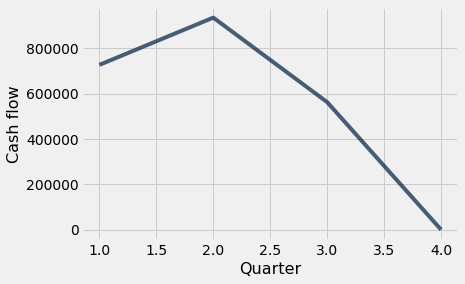

In [13]:
Results_Table.plot('Quarter', 'Cash flow') 

## Question 3: Price Sensitivity Analysis

In [14]:
num_fin_quarters = 4 

def price_analysis(price_ibm, price_mac):
    Pb = {} # production of IBM adapters
    Pa = {} # production of Mac adapters 

    Sb = {} # unit sales of IBM adapters
    Sa = {} # unit sales of Mac adapters

    Adb = {} # money spent on advertisement for IBM adapters
    Ada = {} # money spent on advertisement for Mac adapters

    Inb = {} # Inventory of IBM adapters at the end of the quarter 
    Ina = {} # Inventory of Mac adapters at the end of the quarter 
    
    Inhb = {} #Inventory holding costs for IBM adapter
    Inha = {} #Inventory holding costs for Mac adapter

    Cb = {} ## dollars collected IBM
    Ca = {} ## dollars collected Mac

    I = {} # interested earned from Treasury Bills
    C = {} # cash flow

    model = Model('American Office Systems Case Study')

    for i in range(4):
        Pb[i]  = model.addVar(lb=0)
        Pa[i]  = model.addVar(lb=0)
        Sb[i]  = model.addVar(lb=0)
        Sa[i]  = model.addVar(lb=0)
        Adb[i] = model.addVar(lb=0)
        Ada[i] = model.addVar(lb=0)
        Inb[i] = model.addVar(lb=0)
        Ina[i] = model.addVar(lb=0)
        Inhb[i]= model.addVar(lb=0)
        Inha[i]= model.addVar(lb=0)
        Cb[i]  = model.addVar(lb=0)
        Ca[i]  = model.addVar(lb=0)
        I[i]   = model.addVar(lb=0)
        C[i]   = model.addVar(lb=0)


    #Production constraints
    ##IBM
    con_prod_ibm = {}

    con_prod_ibm[0] = model.addConstr(Pb[0]<= 28800) #number of IBM adapter units that can be produced in Q1
    con_prod_ibm[1] = model.addConstr(Pb[1]<= 28800) #number of IBM adapter units that can be produced in Q2
    con_prod_ibm[2] = model.addConstr(Pb[2]<= 28800) #number of IBM adapter units that can be produced in Q3
    con_prod_ibm[3] = model.addConstr(Pb[3]<= 31680) #number of IBM adapter units that can be produced in Q4

    ##Mac
    con_prod_mac = {}

    con_prod_mac[0] = model.addConstr(Pa[0]<= 9600) #number of Mac adapter units that can be produced in Q1
    con_prod_mac[1] = model.addConstr(Pa[1]<= 9600) #number of Mac adapter units that can be produced in Q2
    con_prod_mac[2] = model.addConstr(Pa[2]<= 9600) #number of Mac adapter units that can be produced in Q3
    con_prod_mac[3] = model.addConstr(Pa[3]<= 10560) #number of Mac adapter units that can be produced in Q4
    
    ## Constraint Formula for IBM Inventory on Hand (IOH)
    con_IOH_ibm = {}

    con_IOH_ibm[0] = model.addConstr(Inb[0] == 10000 + Pb[0] - (Adb[0]/per_sale + Sb[0]))
    con_IOH_ibm[1] = model.addConstr(Inb[1] == Inb[0] + Pb[1] - (Adb[1]/per_sale + Sb[1]))
    con_IOH_ibm[2] = model.addConstr(Inb[2] == Inb[1] + Pb[2] - (Adb[2]/per_sale + Sb[2]))
    con_IOH_ibm[3] =  model.addConstr(Inb[3] == Inb[2] + Pb[3] - (Adb[3]/per_sale + Sb[3]))

    ## Constraint Formula for Mac Inventory on Hand (IOH)
    con_IOH_mac = {}

    con_IOH_mac[0] = model.addConstr(Inb[0] == 5000 + Pa[0] - (Ada[0]/per_sale + Sa[0]))
    con_IOH_mac[1] = model.addConstr(Inb[1] == Inb[0] + Pa[1] - (Ada[1]/per_sale + Sa[1]))
    con_IOH_mac[2] = model.addConstr(Inb[2] == Inb[1] + Pa[2] - (Ada[2]/per_sale + Sa[2]))
    con_IOH_mac[3] =  model.addConstr(Inb[3] == Inb[2] + Pa[3] - (Ada[3]/per_sale + Sa[3]))

    ##Constraints for inventory requirements for IBM (ie. inventory at end of Q must be 1.1X forecasted sales)
    con_req_invent_ibm = {}

    con_req_invent_ibm[0] = model.addConstr(Inb[0] >= 1.1*ibm_forecast[1] - Pb[0])
    con_req_invent_ibm[1] = model.addConstr(Inb[1] >= 1.1*ibm_forecast[2] - Pb[1])
    con_req_invent_ibm[2] = model.addConstr(Inb[2] >= 1.1*ibm_forecast[3]- Pb[2])
    con_req_invent_ibm[3] = model.addConstr(Inb[3] >= ibm_forecast[3]*2 - Pb[3])

    ## Constraints for inventory Requirements for Mac
    con_req_invent_mac = {}

    con_req_invent_mac[0] = model.addConstr(Ina[0] >= 1.1*mac_forecast[1] - Pa[0])
    con_req_invent_mac[1] = model.addConstr(Ina[1] >= 1.1*mac_forecast[2] - Pa[1])
    con_req_invent_mac[2] = model.addConstr(Ina[2] >= 1.1*mac_forecast[3] - Pa[2])
    con_req_invent_mac[3] = model.addConstr(Ina[3] >= mac_forecast[3]*2 - Pa[3])
    
    ## Constraints for inventory holding costs 
    con_holding_invent_ibm = {}

    con_holding_invent_ibm[0] = model.addConstr(Inhb[0] == 0.01*4*price_ibm*(Inb[0]))
    con_holding_invent_ibm[1] = model.addConstr(Inhb[1] == 0.01*4*price_ibm*(Inb[1]))
    con_holding_invent_ibm[2] = model.addConstr(Inhb[2] == 0.01*4*price_ibm*(Inb[2]))

    con_holding_invent_mac = {}

    con_holding_invent_mac[0] = model.addConstr(Inha[0] == 0.01*4*price_mac*Ina[0])
    con_holding_invent_mac[1] = model.addConstr(Inha[1] == 0.01*4*price_mac*Ina[1])
    con_holding_invent_mac[2] = model.addConstr(Inha[2] == 0.01*4*price_mac*Ina[2])
    
    ## constraints for cash inflow from sales
    con_cashCol_ibm = {}

    con_cashCol_ibm[0] = model.addConstr(Cb[0] == price_ibm*(0.75*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.20*8000) + price_ibm*(0.03*7000) + (0.02*0.5)*6000*price_ibm)
    con_cashCol_ibm[1] = model.addConstr(Cb[1] == price_ibm*(0.75*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.20*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.03*8000) + (0.02*0.5)*7000*price_ibm)
    con_cashCol_ibm[2] = model.addConstr(Cb[2] == price_ibm*(0.75*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.20*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.03*(Adb[0]/per_sale + Sb[0])) + (0.02*0.5)*8000*price_ibm)
    con_cashCol_ibm[3] = model.addConstr(Cb[3] == price_ibm*(0.75*(Adb[3]/per_sale + Sb[3])) + price_ibm*(0.20*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.03*(Adb[1]/per_sale + Sb[1])) + (0.02*0.5)*(Adb[0]/per_sale + Sb[0])*price_ibm)


    con_cashCol_mac = {}

    con_cashCol_mac[0] = model.addConstr(Ca[0] == price_mac*(0.80*(Ada[0]/per_sale + Sa[0])) + price_mac*(0.11*1600) + price_mac*(0.05*1400) + (0.04*0.5)*1200*price_mac)
    con_cashCol_mac[1] = model.addConstr(Ca[1] == price_mac*(0.80*(Ada[1]/per_sale + Sa[1])) + price_mac*(0.11*(Ada[0]/per_sale + Sb[0])) + price_mac*(0.05*1600) + (0.04*0.5)*1400*price_mac)
    con_cashCol_mac[2] = model.addConstr(Ca[2] == price_mac*(0.80*(Ada[2]/per_sale + Sa[2])) + price_mac*(0.11*(Ada[1]/per_sale + Sb[1])) + price_mac*(0.05*(Ada[0]/per_sale + Sa[0])) + (0.04*0.5)*1600*price_mac)
    con_cashCol_mac[3] = model.addConstr(Ca[3] == price_mac*(0.80*(Ada[3]/per_sale + Sa[3])) + price_mac*(0.11*(Ada[2]/per_sale + Sb[2])) + price_mac*(0.05*(Ada[1]/per_sale + Sa[1])) + (0.04*0.5)*(Ada[0]/per_sale + Sa[0])*price_mac)

    #Interest earned investing extra cash: 
    extra_cash = {}

    extra_cash[1] = model.addConstr(I[0] == C[0]*0.06)
    extra_cash[2] = model.addConstr(I[1] == C[1]*0.06)
    extra_cash[3] = model.addConstr(I[2] == C[2]*0.06)

    ##create constraint for total cash flow
    ##cash flow = cash in (ibm) + cash in (mac) - carrying cost - cost of capital (LoC: quarterly basis) - advertising cost (ibm + mac) - variable cost of prod. - fixed costs

    cash_flow = {}

    cash_flow[0] = model.addConstr(C[0] == Cb[0] + Ca[0] - 100*Pb[0] - 110*Pa[0] - Adb[0] - Ada[0] - (0.03*100)*(Inb[0] + Ina[0]) - 3000000)
    cash_flow[1] = model.addConstr(C[1] == Cb[1] + Ca[1] + I[0] - 100*Pb[1] - 110*Pa[1] - Adb[1] - Ada[1] - (0.03*100)*(Inb[1] + Ina[1])- 3000000)
    cash_flow[2] = model.addConstr(C[2] == Cb[2] + Ca[2] + I[1] - 100*Pb[2] - 110*Pa[2] - Adb[2] - Ada[2] - (0.03*100)*(Inb[2] + Ina[2])- 3000000) 
    cash_flow[1] = model.addConstr(C[3] == Cb[3] + Ca[3] + I[2] - 100*Pb[3] - 110*Pa[3] - Adb[3] - Ada[3] - (0.03*100)*(Inb[3] + Ina[3])- 3000000) 
    

    ## define objective function
    num_fin_quarters = 4 


    ## define
    obj_function = quicksum((Cb[i] + Ca[i] - (Inhb[i] + Inha[i]) - Adb[i] -Ada[i] - cost_ibm*Pb[i] - cost_mac*Pa[i] - 3/4*loan_rate*L - 3100000) for i in np.arange(num_fin_quarters))
    #maximize
    model.setObjective(obj_function, GRB.MAXIMIZE)

    #optimize
    model.optimize()
    return model.objVal

#### Initially,  prices are as follows: IBM = $175, Apple = $200. Th respective profit is calculated below

In [15]:
price_analysis(175, 200)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    2.1116000e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds
Optimal objective  2.111600000e+06


2111600.0

#### If price for IBM = $173, Apple = $198

In [16]:
price_analysis(173, 198)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    1.7681240e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds
Optimal objective  1.768124000e+06


1768124.0

#### If price for IBM = $172, Apple = $197

In [17]:
price_analysis(172,197)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    1.5963860e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds
Optimal objective  1.596386000e+06


1596386.0

#### If price for IBM = $180, Apple = $205

In [18]:
price_analysis(180, 205)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    2.9702900e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds
Optimal objective  2.970290000e+06


2970290.0

The above analysis shows that yearly profits are extremely sensitive to the price at which the adapters are sold. This price to profit relationship is not strange. First, this is because American Office Systems is already highly cash-constrained to begin with, meaning that the marginal effect on profit of an increase or decrease in price will be large. Second, and to add to this, adapter sales are the most significant part of American Office System's revenue, so profit and adapter prices are intrinsically linked in this business model. 

These notions are confirmed in our results: when we bring the prices of IBM and Mac adapters down by 2 dollars to 173 dollars and 198 dollars respectively, yearly profit decreases by 343476 dollars, or better yet almost 14 percent (at a rate of 7 percent per one dollar decrease). Bringing the price of the adapters down by a further dollar (to 172 dollars and 197 dollars for IBM and Mac, respectively) decreases the yearly profit a further 171,738 dollars to 1,956,386 dollars, and constitutes a further 7 percent decrease in profit. Likewise, if we were to increase the price of both adapters by 5 dollars (to 180 and 205 dollars, respectively) we would see profit increase to 3,330,029 dollars (by 34 percent). Put in another, we would observe a 6.9 percent increase in profit per one dollar increase in the price of the adapters. Clearly, the sensitivity is symmetric. 

One important consideration here is that we are assuming that consumers themselves will not be sensitive to price, and will be buying the product at the same rate regardless of the price.

## Question 4: Production Cost Sensitivity Analysis

In [19]:
num_fin_quarters = 4 

def cost_analysis(cost_ibm, cost_mac):
    Pb = {} # production of IBM adapters
    Pa = {} # production of Mac adapters 

    Sb = {} # unit sales of IBM adapters
    Sa = {} # unit sales of Mac adapters

    Adb = {} # money spent on advertisement for IBM adapters
    Ada = {} # money spent on advertisement for Mac adapters

    Inb = {} # Inventory of IBM adapters at the end of the quarter 
    Ina = {} # Inventory of Mac adapters at the end of the quarter 
    
    Inhb = {} #Inventory holding costs for IBM adapter
    Inha = {} #Inventory holding costs for Mac adapter

    Cb = {} ## dollars collected IBM
    Ca = {} ## dollars collected Mac

    I = {} # interested earned from Treasury Bills
    C = {} # cash flow

    model = Model('American Office Systems Case Study')

    for i in range(4):
        Pb[i]  = model.addVar(lb=0)
        Pa[i]  = model.addVar(lb=0)
        Sb[i]  = model.addVar(lb=0)
        Sa[i]  = model.addVar(lb=0)
        Adb[i] = model.addVar(lb=0)
        Ada[i] = model.addVar(lb=0)
        Inb[i] = model.addVar(lb=0)
        Ina[i] = model.addVar(lb=0)
        Inhb[i]= model.addVar(lb=0)
        Inha[i]= model.addVar(lb=0)
        Cb[i]  = model.addVar(lb=0)
        Ca[i]  = model.addVar(lb=0)
        I[i]   = model.addVar(lb=0)
        C[i]   = model.addVar(lb=0)


    #Production constraints
    ##IBM
    con_prod_ibm = {}

    con_prod_ibm[0] = model.addConstr(Pb[0]<= 28800) #number of IBM adapter units that can be produced in Q1
    con_prod_ibm[1] = model.addConstr(Pb[1]<= 28800) #number of IBM adapter units that can be produced in Q2
    con_prod_ibm[2] = model.addConstr(Pb[2]<= 28800) #number of IBM adapter units that can be produced in Q3
    con_prod_ibm[3] = model.addConstr(Pb[3]<= 31680) #number of IBM adapter units that can be produced in Q4

    ##Mac
    con_prod_mac = {}

    con_prod_mac[0] = model.addConstr(Pa[0]<= 9600) #number of Mac adapter units that can be produced in Q1
    con_prod_mac[1] = model.addConstr(Pa[1]<= 9600) #number of Mac adapter units that can be produced in Q2
    con_prod_mac[2] = model.addConstr(Pa[2]<= 9600) #number of Mac adapter units that can be produced in Q3
    con_prod_mac[3] = model.addConstr(Pa[3]<= 10560) #number of Mac adapter units that can be produced in Q4
    
    ## Constraint Formula for IBM Inventory on Hand (IOH)
    con_IOH_ibm = {}

    con_IOH_ibm[0] = model.addConstr(Inb[0] == 10000 + Pb[0] - (Adb[0]/per_sale + Sb[0]))
    con_IOH_ibm[1] = model.addConstr(Inb[1] == Inb[0] + Pb[1] - (Adb[1]/per_sale + Sb[1]))
    con_IOH_ibm[2] = model.addConstr(Inb[2] == Inb[1] + Pb[2] - (Adb[2]/per_sale + Sb[2]))
    con_IOH_ibm[3] =  model.addConstr(Inb[3] == Inb[2] + Pb[3] - (Adb[3]/per_sale + Sb[3]))

    ## Constraint Formula for Mac Inventory on Hand (IOH)
    con_IOH_mac = {}

    con_IOH_mac[0] = model.addConstr(Inb[0] == 5000 + Pa[0] - (Ada[0]/per_sale + Sa[0]))
    con_IOH_mac[1] = model.addConstr(Inb[1] == Inb[0] + Pa[1] - (Ada[1]/per_sale + Sa[1]))
    con_IOH_mac[2] = model.addConstr(Inb[2] == Inb[1] + Pa[2] - (Ada[2]/per_sale + Sa[2]))
    con_IOH_mac[3] =  model.addConstr(Inb[3] == Inb[2] + Pa[3] - (Ada[3]/per_sale + Sa[3]))

    ##Constraints for inventory requirements for IBM (ie. inventory at end of Q must be 1.1X forecasted sales)
    con_req_invent_ibm = {}

    con_req_invent_ibm[0] = model.addConstr(Inb[0] >= 1.1*ibm_forecast[1] - Pb[0])
    con_req_invent_ibm[1] = model.addConstr(Inb[1] >= 1.1*ibm_forecast[2] - Pb[1])
    con_req_invent_ibm[2] = model.addConstr(Inb[2] >= 1.1*ibm_forecast[3]- Pb[2])
    con_req_invent_ibm[3] = model.addConstr(Inb[3] >= ibm_forecast[3]*2 - Pb[3])

    ## Constraints for inventory Requirements for Mac
    con_req_invent_mac = {}

    con_req_invent_mac[0] = model.addConstr(Ina[0] >= 1.1*mac_forecast[1] - Pa[0])
    con_req_invent_mac[1] = model.addConstr(Ina[1] >= 1.1*mac_forecast[2] - Pa[1])
    con_req_invent_mac[2] = model.addConstr(Ina[2] >= 1.1*mac_forecast[3] - Pa[2])
    con_req_invent_mac[3] = model.addConstr(Ina[3] >= mac_forecast[3]*2 - Pa[3])
    
    ## Constraints for inventory holding costs 
    con_holding_invent_ibm = {}

    con_holding_invent_ibm[0] = model.addConstr(Inhb[0] == 0.01*4*price_ibm*(Inb[0]))
    con_holding_invent_ibm[1] = model.addConstr(Inhb[1] == 0.01*4*price_ibm*(Inb[1]))
    con_holding_invent_ibm[2] = model.addConstr(Inhb[2] == 0.01*4*price_ibm*(Inb[2]))

    con_holding_invent_mac = {}

    con_holding_invent_mac[0] = model.addConstr(Inha[0] == 0.01*4*price_mac*Ina[0])
    con_holding_invent_mac[1] = model.addConstr(Inha[1] == 0.01*4*price_mac*Ina[1])
    con_holding_invent_mac[2] = model.addConstr(Inha[2] == 0.01*4*price_mac*Ina[2])
    
    ## constraints for cash inflow from sales
    con_cashCol_ibm = {}

    con_cashCol_ibm[0] = model.addConstr(Cb[0] == price_ibm*(0.75*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.20*8000) + price_ibm*(0.03*7000) + (0.02*0.5)*6000*price_ibm)
    con_cashCol_ibm[1] = model.addConstr(Cb[1] == price_ibm*(0.75*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.20*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.03*8000) + (0.02*0.5)*7000*price_ibm)
    con_cashCol_ibm[2] = model.addConstr(Cb[2] == price_ibm*(0.75*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.20*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.03*(Adb[0]/per_sale + Sb[0])) + (0.02*0.5)*8000*price_ibm)
    con_cashCol_ibm[3] = model.addConstr(Cb[3] == price_ibm*(0.75*(Adb[3]/per_sale + Sb[3])) + price_ibm*(0.20*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.03*(Adb[1]/per_sale + Sb[1])) + (0.02*0.5)*(Adb[0]/per_sale + Sb[0])*price_ibm)


    con_cashCol_mac = {}

    con_cashCol_mac[0] = model.addConstr(Ca[0] == price_mac*(0.80*(Ada[0]/per_sale + Sa[0])) + price_mac*(0.11*1600) + price_mac*(0.05*1400) + (0.04*0.5)*1200*price_mac)
    con_cashCol_mac[1] = model.addConstr(Ca[1] == price_mac*(0.80*(Ada[1]/per_sale + Sa[1])) + price_mac*(0.11*(Ada[0]/per_sale + Sb[0])) + price_mac*(0.05*1600) + (0.04*0.5)*1400*price_mac)
    con_cashCol_mac[2] = model.addConstr(Ca[2] == price_mac*(0.80*(Ada[2]/per_sale + Sa[2])) + price_mac*(0.11*(Ada[1]/per_sale + Sb[1])) + price_mac*(0.05*(Ada[0]/per_sale + Sa[0])) + (0.04*0.5)*1600*price_mac)
    con_cashCol_mac[3] = model.addConstr(Ca[3] == price_mac*(0.80*(Ada[3]/per_sale + Sa[3])) + price_mac*(0.11*(Ada[2]/per_sale + Sb[2])) + price_mac*(0.05*(Ada[1]/per_sale + Sa[1])) + (0.04*0.5)*(Ada[0]/per_sale + Sa[0])*price_mac)

    #Interest earned investing extra cash: 
    extra_cash = {}

    extra_cash[1] = model.addConstr(I[0] == C[0]*0.06)
    extra_cash[2] = model.addConstr(I[1] == C[1]*0.06)
    extra_cash[3] = model.addConstr(I[2] == C[2]*0.06)

    ##create constraint for total cash flow
    ##cash flow = cash in (ibm) + cash in (mac) - carrying cost - cost of capital (LoC: quarterly basis) - advertising cost (ibm + mac) - variable cost of prod. - fixed costs

    cash_flow = {}

    cash_flow[0] = model.addConstr(C[0] == Cb[0] + Ca[0] - 100*Pb[0] - 110*Pa[0] - Adb[0] - Ada[0] - (0.03*100)*(Inb[0] + Ina[0]) - 3000000)
    cash_flow[1] = model.addConstr(C[1] == Cb[1] + Ca[1] + I[0] - 100*Pb[1] - 110*Pa[1] - Adb[1] - Ada[1] - (0.03*100)*(Inb[1] + Ina[1])- 3000000)
    cash_flow[2] = model.addConstr(C[2] == Cb[2] + Ca[2] + I[1] - 100*Pb[2] - 110*Pa[2] - Adb[2] - Ada[2] - (0.03*100)*(Inb[2] + Ina[2])- 3000000) 
    cash_flow[1] = model.addConstr(C[3] == Cb[3] + Ca[3] + I[2] - 100*Pb[3] - 110*Pa[3] - Adb[3] - Ada[3] - (0.03*100)*(Inb[3] + Ina[3])- 3000000) 
    

    ## define objective function
    num_fin_quarters = 4 


    ## define
    obj_function = quicksum((Cb[i] + Ca[i] - (Inhb[i] + Inha[i]) - Adb[i] -Ada[i] - cost_ibm*Pb[i] - cost_mac*Pa[i] - 3/4*loan_rate*L - 3100000) for i in np.arange(num_fin_quarters))
    #maximize
    model.setObjective(obj_function, GRB.MAXIMIZE)

    #optimize
    model.optimize()
    return model.objVal

#### a) Suppose costs were: IBM = 102, MAC = 112

In [20]:
cost_analysis(102, 112)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.05s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    1.7967200e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.06 seconds
Optimal objective  1.796720000e+06


1796720.0

#### b) Suppose costs were: IBM = 105, MAC = 115

In [21]:
cost_analysis(105, 115)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    1.3244000e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.01 seconds
Optimal objective  1.324400000e+06


1324400.0

As the results to our sensitivity analysis for costs show, American Office Systems is highly sensitive to the cost of production of their adapters too. As with price, this is expected because of their cash-constrained financial situation, an increase in cost is likely to have a substantial marginal effect on price. Our results certainly indicate this: a 2 dollar increase in cost of production drives profits down by 12.7 percent (314,880 dollars). If the cost of production increased by 5 dollars from the original to 105 dollars and 115 dollars for IBM and Mac respectively, profit would decrease by 31.8 percent (787,200 dollars). Altogether the rate of decrease of profit per every one dollar increase in cost of production is about 6%. What this shows is that profit in our business model is slightly more sensitive to the price of the adapters, than to their cost of production, although controlling the latter is crucial too. 

## 6) Sensitivity to Advertising

In [22]:
num_fin_quarters = 4 

def ad_analysis(per_sale):
    Pb = {} # production of IBM adapters
    Pa = {} # production of Mac adapters 

    Sb = {} # unit sales of IBM adapters
    Sa = {} # unit sales of Mac adapters

    Adb = {} # money spent on advertisement for IBM adapters
    Ada = {} # money spent on advertisement for Mac adapters

    Inb = {} # Inventory of IBM adapters at the end of the quarter 
    Ina = {} # Inventory of Mac adapters at the end of the quarter 
    
    Inhb = {} #Inventory holding costs for IBM adapter
    Inha = {} #Inventory holding costs for Mac adapter

    Cb = {} ## dollars collected IBM
    Ca = {} ## dollars collected Mac

    I = {} # interested earned from Treasury Bills
    C = {} # cash flow

    model = Model('American Office Systems Case Study')

    for i in range(4):
        Pb[i]  = model.addVar(lb=0)
        Pa[i]  = model.addVar(lb=0)
        Sb[i]  = model.addVar(lb=0)
        Sa[i]  = model.addVar(lb=0)
        Adb[i] = model.addVar(lb=0)
        Ada[i] = model.addVar(lb=0)
        Inb[i] = model.addVar(lb=0)
        Ina[i] = model.addVar(lb=0)
        Inhb[i]= model.addVar(lb=0)
        Inha[i]= model.addVar(lb=0)
        Cb[i]  = model.addVar(lb=0)
        Ca[i]  = model.addVar(lb=0)
        I[i]   = model.addVar(lb=0)
        C[i]   = model.addVar(lb=0)


    #Production constraints
    ##IBM
    con_prod_ibm = {}

    con_prod_ibm[0] = model.addConstr(Pb[0]<= 28800) #number of IBM adapter units that can be produced in Q1
    con_prod_ibm[1] = model.addConstr(Pb[1]<= 28800) #number of IBM adapter units that can be produced in Q2
    con_prod_ibm[2] = model.addConstr(Pb[2]<= 28800) #number of IBM adapter units that can be produced in Q3
    con_prod_ibm[3] = model.addConstr(Pb[3]<= 31680) #number of IBM adapter units that can be produced in Q4

    ##Mac
    con_prod_mac = {}

    con_prod_mac[0] = model.addConstr(Pa[0]<= 9600) #number of Mac adapter units that can be produced in Q1
    con_prod_mac[1] = model.addConstr(Pa[1]<= 9600) #number of Mac adapter units that can be produced in Q2
    con_prod_mac[2] = model.addConstr(Pa[2]<= 9600) #number of Mac adapter units that can be produced in Q3
    con_prod_mac[3] = model.addConstr(Pa[3]<= 10560) #number of Mac adapter units that can be produced in Q4
    
    ## Constraint Formula for IBM Inventory on Hand (IOH)
    con_IOH_ibm = {}

    con_IOH_ibm[0] = model.addConstr(Inb[0] == 10000 + Pb[0] - (Adb[0]/per_sale + Sb[0]))
    con_IOH_ibm[1] = model.addConstr(Inb[1] == Inb[0] + Pb[1] - (Adb[1]/per_sale + Sb[1]))
    con_IOH_ibm[2] = model.addConstr(Inb[2] == Inb[1] + Pb[2] - (Adb[2]/per_sale + Sb[2]))
    con_IOH_ibm[3] =  model.addConstr(Inb[3] == Inb[2] + Pb[3] - (Adb[3]/per_sale + Sb[3]))

    ## Constraint Formula for Mac Inventory on Hand (IOH)
    con_IOH_mac = {}

    con_IOH_mac[0] = model.addConstr(Inb[0] == 5000 + Pa[0] - (Ada[0]/per_sale + Sa[0]))
    con_IOH_mac[1] = model.addConstr(Inb[1] == Inb[0] + Pa[1] - (Ada[1]/per_sale + Sa[1]))
    con_IOH_mac[2] = model.addConstr(Inb[2] == Inb[1] + Pa[2] - (Ada[2]/per_sale + Sa[2]))
    con_IOH_mac[3] =  model.addConstr(Inb[3] == Inb[2] + Pa[3] - (Ada[3]/per_sale + Sa[3]))

    ##Constraints for inventory requirements for IBM (ie. inventory at end of Q must be 1.1X forecasted sales)
    con_req_invent_ibm = {}

    con_req_invent_ibm[0] = model.addConstr(Inb[0] >= 1.1*ibm_forecast[1] - Pb[0])
    con_req_invent_ibm[1] = model.addConstr(Inb[1] >= 1.1*ibm_forecast[2] - Pb[1])
    con_req_invent_ibm[2] = model.addConstr(Inb[2] >= 1.1*ibm_forecast[3]- Pb[2])
    con_req_invent_ibm[3] = model.addConstr(Inb[3] >= ibm_forecast[3]*2 - Pb[3])

    ## Constraints for inventory Requirements for Mac
    con_req_invent_mac = {}

    con_req_invent_mac[0] = model.addConstr(Ina[0] >= 1.1*mac_forecast[1] - Pa[0])
    con_req_invent_mac[1] = model.addConstr(Ina[1] >= 1.1*mac_forecast[2] - Pa[1])
    con_req_invent_mac[2] = model.addConstr(Ina[2] >= 1.1*mac_forecast[3] - Pa[2])
    con_req_invent_mac[3] = model.addConstr(Ina[3] >= mac_forecast[3]*2 - Pa[3])
    
    ## Constraints for inventory holding costs 
    con_holding_invent_ibm = {}

    con_holding_invent_ibm[0] = model.addConstr(Inhb[0] == 0.01*4*price_ibm*(Inb[0]))
    con_holding_invent_ibm[1] = model.addConstr(Inhb[1] == 0.01*4*price_ibm*(Inb[1]))
    con_holding_invent_ibm[2] = model.addConstr(Inhb[2] == 0.01*4*price_ibm*(Inb[2]))

    con_holding_invent_mac = {}

    con_holding_invent_mac[0] = model.addConstr(Inha[0] == 0.01*4*price_mac*Ina[0])
    con_holding_invent_mac[1] = model.addConstr(Inha[1] == 0.01*4*price_mac*Ina[1])
    con_holding_invent_mac[2] = model.addConstr(Inha[2] == 0.01*4*price_mac*Ina[2])
    
    ## constraints for cash inflow from sales
    con_cashCol_ibm = {}

    con_cashCol_ibm[0] = model.addConstr(Cb[0] == price_ibm*(0.75*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.20*8000) + price_ibm*(0.03*7000) + (0.02*0.5)*6000*price_ibm)
    con_cashCol_ibm[1] = model.addConstr(Cb[1] == price_ibm*(0.75*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.20*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.03*8000) + (0.02*0.5)*7000*price_ibm)
    con_cashCol_ibm[2] = model.addConstr(Cb[2] == price_ibm*(0.75*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.20*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.03*(Adb[0]/per_sale + Sb[0])) + (0.02*0.5)*8000*price_ibm)
    con_cashCol_ibm[3] = model.addConstr(Cb[3] == price_ibm*(0.75*(Adb[3]/per_sale + Sb[3])) + price_ibm*(0.20*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.03*(Adb[1]/per_sale + Sb[1])) + (0.02*0.5)*(Adb[0]/per_sale + Sb[0])*price_ibm)


    con_cashCol_mac = {}

    con_cashCol_mac[0] = model.addConstr(Ca[0] == price_mac*(0.80*(Ada[0]/per_sale + Sa[0])) + price_mac*(0.11*1600) + price_mac*(0.05*1400) + (0.04*0.5)*1200*price_mac)
    con_cashCol_mac[1] = model.addConstr(Ca[1] == price_mac*(0.80*(Ada[1]/per_sale + Sa[1])) + price_mac*(0.11*(Ada[0]/per_sale + Sb[0])) + price_mac*(0.05*1600) + (0.04*0.5)*1400*price_mac)
    con_cashCol_mac[2] = model.addConstr(Ca[2] == price_mac*(0.80*(Ada[2]/per_sale + Sa[2])) + price_mac*(0.11*(Ada[1]/per_sale + Sb[1])) + price_mac*(0.05*(Ada[0]/per_sale + Sa[0])) + (0.04*0.5)*1600*price_mac)
    con_cashCol_mac[3] = model.addConstr(Ca[3] == price_mac*(0.80*(Ada[3]/per_sale + Sa[3])) + price_mac*(0.11*(Ada[2]/per_sale + Sb[2])) + price_mac*(0.05*(Ada[1]/per_sale + Sa[1])) + (0.04*0.5)*(Ada[0]/per_sale + Sa[0])*price_mac)

    #Interest earned investing extra cash: 
    extra_cash = {}

    extra_cash[1] = model.addConstr(I[0] == C[0]*0.06)
    extra_cash[2] = model.addConstr(I[1] == C[1]*0.06)
    extra_cash[3] = model.addConstr(I[2] == C[2]*0.06)

    ##create constraint for total cash flow
    ##cash flow = cash in (ibm) + cash in (mac) - carrying cost - cost of capital (LoC: quarterly basis) - advertising cost (ibm + mac) - variable cost of prod. - fixed costs

    cash_flow = {}

    cash_flow[0] = model.addConstr(C[0] == Cb[0] + Ca[0] - 100*Pb[0] - 110*Pa[0] - Adb[0] - Ada[0] - (0.03*100)*(Inb[0] + Ina[0]) - 3000000)
    cash_flow[1] = model.addConstr(C[1] == Cb[1] + Ca[1] + I[0] - 100*Pb[1] - 110*Pa[1] - Adb[1] - Ada[1] - (0.03*100)*(Inb[1] + Ina[1])- 3000000)
    cash_flow[2] = model.addConstr(C[2] == Cb[2] + Ca[2] + I[1] - 100*Pb[2] - 110*Pa[2] - Adb[2] - Ada[2] - (0.03*100)*(Inb[2] + Ina[2])- 3000000) 
    cash_flow[1] = model.addConstr(C[3] == Cb[3] + Ca[3] + I[2] - 100*Pb[3] - 110*Pa[3] - Adb[3] - Ada[3] - (0.03*100)*(Inb[3] + Ina[3])- 3000000) 
    

    ## define objective function
    num_fin_quarters = 4 


    ## define
    obj_function = quicksum((Cb[i] + Ca[i] - (Inhb[i] + Inha[i]) - Adb[i] -Ada[i] - cost_ibm*Pb[i] - cost_mac*Pa[i] - 3/4*loan_rate*L - 3100000) for i in np.arange(num_fin_quarters))
    #maximize
    model.setObjective(obj_function, GRB.MAXIMIZE)

    #optimize
    model.optimize()
    return model.objVal

#### Presently, it takes 10 dollars to sell one unit

In [23]:
ad_analysis(10)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    2.1116000e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.02 seconds
Optimal objective  2.111600000e+06


2111600.0

#### If it took 100 dollars to sell a unit: 

In [24]:
ad_analysis(100)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    1.7060000e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.02 seconds
Optimal objective  1.706000000e+06


1706000.0

#### If it took 12.50 dollars to sell one unit

In [25]:
ad_analysis(12.5)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    2.0271000e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.02 seconds
Optimal objective  2.027100000e+06


2027100.0

Since advertisement spending constitutes another cost which American Office Systems incurs, we expect it to follow the same logic as with cost of production. Advertisement costs are important in this model for two reasons. First, the product is in its introductory phase of its lifecycle. Second, American Office Systems has been in business for 60 years, but there is no consumer nor industrial awareness of the company. What advertisement enables them to do is to expand their brand recognition (something which could potentially have even more poignant effects in long-run profits, but this is out of the scope of the model), and this could potentially help drive sales, considering that this is a promising product. 

Our above sensitivity analysis show this. If advertisement spending were to increase ten-fold to 100 dollars to sell one unit of either adapter, profit would decrease by 16 percent. Likewise, if advertisement spending were to increase to 12.50 dollars (from 10.00 dollars originally) we would see profit decrease by 3.41%. While profit is clearly sensitive to advertisement spending, we can see that it is nowhere near as sensitive to this as it is to the price and production cost of the adapters. This makes sense since we know that the product sells without advertising too. 

## 7a) Loan Rate Sensitivity Analysis

In [26]:
num_fin_quarters = 4 

def loan_rate_analysis(loan_rate):
    Pb = {} # production of IBM adapters
    Pa = {} # production of Mac adapters 

    Sb = {} # unit sales of IBM adapters
    Sa = {} # unit sales of Mac adapters

    Adb = {} # money spent on advertisement for IBM adapters
    Ada = {} # money spent on advertisement for Mac adapters

    Inb = {} # Inventory of IBM adapters at the end of the quarter 
    Ina = {} # Inventory of Mac adapters at the end of the quarter 
    
    Inhb = {} #Inventory holding costs for IBM adapter
    Inha = {} #Inventory holding costs for Mac adapter

    Cb = {} ## dollars collected IBM
    Ca = {} ## dollars collected Mac

    I = {} # interested earned from Treasury Bills
    C = {} # cash flow

    model = Model('American Office Systems Case Study')

    for i in range(4):
        Pb[i]  = model.addVar(lb=0)
        Pa[i]  = model.addVar(lb=0)
        Sb[i]  = model.addVar(lb=0)
        Sa[i]  = model.addVar(lb=0)
        Adb[i] = model.addVar(lb=0)
        Ada[i] = model.addVar(lb=0)
        Inb[i] = model.addVar(lb=0)
        Ina[i] = model.addVar(lb=0)
        Inhb[i]= model.addVar(lb=0)
        Inha[i]= model.addVar(lb=0)
        Cb[i]  = model.addVar(lb=0)
        Ca[i]  = model.addVar(lb=0)
        I[i]   = model.addVar(lb=0)
        C[i]   = model.addVar(lb=0)


    #Production constraints
    ##IBM
    con_prod_ibm = {}

    con_prod_ibm[0] = model.addConstr(Pb[0]<= 28800) #number of IBM adapter units that can be produced in Q1
    con_prod_ibm[1] = model.addConstr(Pb[1]<= 28800) #number of IBM adapter units that can be produced in Q2
    con_prod_ibm[2] = model.addConstr(Pb[2]<= 28800) #number of IBM adapter units that can be produced in Q3
    con_prod_ibm[3] = model.addConstr(Pb[3]<= 31680) #number of IBM adapter units that can be produced in Q4

    ##Mac
    con_prod_mac = {}

    con_prod_mac[0] = model.addConstr(Pa[0]<= 9600) #number of Mac adapter units that can be produced in Q1
    con_prod_mac[1] = model.addConstr(Pa[1]<= 9600) #number of Mac adapter units that can be produced in Q2
    con_prod_mac[2] = model.addConstr(Pa[2]<= 9600) #number of Mac adapter units that can be produced in Q3
    con_prod_mac[3] = model.addConstr(Pa[3]<= 10560) #number of Mac adapter units that can be produced in Q4
    
    ## Constraint Formula for IBM Inventory on Hand (IOH)
    con_IOH_ibm = {}

    con_IOH_ibm[0] = model.addConstr(Inb[0] == 10000 + Pb[0] - (Adb[0]/per_sale + Sb[0]))
    con_IOH_ibm[1] = model.addConstr(Inb[1] == Inb[0] + Pb[1] - (Adb[1]/per_sale + Sb[1]))
    con_IOH_ibm[2] = model.addConstr(Inb[2] == Inb[1] + Pb[2] - (Adb[2]/per_sale + Sb[2]))
    con_IOH_ibm[3] =  model.addConstr(Inb[3] == Inb[2] + Pb[3] - (Adb[3]/per_sale + Sb[3]))

    ## Constraint Formula for Mac Inventory on Hand (IOH)
    con_IOH_mac = {}

    con_IOH_mac[0] = model.addConstr(Inb[0] == 5000 + Pa[0] - (Ada[0]/per_sale + Sa[0]))
    con_IOH_mac[1] = model.addConstr(Inb[1] == Inb[0] + Pa[1] - (Ada[1]/per_sale + Sa[1]))
    con_IOH_mac[2] = model.addConstr(Inb[2] == Inb[1] + Pa[2] - (Ada[2]/per_sale + Sa[2]))
    con_IOH_mac[3] =  model.addConstr(Inb[3] == Inb[2] + Pa[3] - (Ada[3]/per_sale + Sa[3]))

    ##Constraints for inventory requirements for IBM (ie. inventory at end of Q must be 1.1X forecasted sales)
    con_req_invent_ibm = {}

    con_req_invent_ibm[0] = model.addConstr(Inb[0] >= 1.1*ibm_forecast[1] - Pb[0])
    con_req_invent_ibm[1] = model.addConstr(Inb[1] >= 1.1*ibm_forecast[2] - Pb[1])
    con_req_invent_ibm[2] = model.addConstr(Inb[2] >= 1.1*ibm_forecast[3]- Pb[2])
    con_req_invent_ibm[3] = model.addConstr(Inb[3] >= ibm_forecast[3]*2 - Pb[3])

    ## Constraints for inventory Requirements for Mac
    con_req_invent_mac = {}

    con_req_invent_mac[0] = model.addConstr(Ina[0] >= 1.1*mac_forecast[1] - Pa[0])
    con_req_invent_mac[1] = model.addConstr(Ina[1] >= 1.1*mac_forecast[2] - Pa[1])
    con_req_invent_mac[2] = model.addConstr(Ina[2] >= 1.1*mac_forecast[3] - Pa[2])
    con_req_invent_mac[3] = model.addConstr(Ina[3] >= mac_forecast[3]*2 - Pa[3])
    
    ## Constraints for inventory holding costs 
    con_holding_invent_ibm = {}

    con_holding_invent_ibm[0] = model.addConstr(Inhb[0] == 0.01*4*price_ibm*(Inb[0]))
    con_holding_invent_ibm[1] = model.addConstr(Inhb[1] == 0.01*4*price_ibm*(Inb[1]))
    con_holding_invent_ibm[2] = model.addConstr(Inhb[2] == 0.01*4*price_ibm*(Inb[2]))

    con_holding_invent_mac = {}

    con_holding_invent_mac[0] = model.addConstr(Inha[0] == 0.01*4*price_mac*Ina[0])
    con_holding_invent_mac[1] = model.addConstr(Inha[1] == 0.01*4*price_mac*Ina[1])
    con_holding_invent_mac[2] = model.addConstr(Inha[2] == 0.01*4*price_mac*Ina[2])
    
    ## constraints for cash inflow from sales
    con_cashCol_ibm = {}

    con_cashCol_ibm[0] = model.addConstr(Cb[0] == price_ibm*(0.75*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.20*8000) + price_ibm*(0.03*7000) + (0.02*0.5)*6000*price_ibm)
    con_cashCol_ibm[1] = model.addConstr(Cb[1] == price_ibm*(0.75*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.20*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.03*8000) + (0.02*0.5)*7000*price_ibm)
    con_cashCol_ibm[2] = model.addConstr(Cb[2] == price_ibm*(0.75*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.20*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.03*(Adb[0]/per_sale + Sb[0])) + (0.02*0.5)*8000*price_ibm)
    con_cashCol_ibm[3] = model.addConstr(Cb[3] == price_ibm*(0.75*(Adb[3]/per_sale + Sb[3])) + price_ibm*(0.20*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.03*(Adb[1]/per_sale + Sb[1])) + (0.02*0.5)*(Adb[0]/per_sale + Sb[0])*price_ibm)


    con_cashCol_mac = {}

    con_cashCol_mac[0] = model.addConstr(Ca[0] == price_mac*(0.80*(Ada[0]/per_sale + Sa[0])) + price_mac*(0.11*1600) + price_mac*(0.05*1400) + (0.04*0.5)*1200*price_mac)
    con_cashCol_mac[1] = model.addConstr(Ca[1] == price_mac*(0.80*(Ada[1]/per_sale + Sa[1])) + price_mac*(0.11*(Ada[0]/per_sale + Sb[0])) + price_mac*(0.05*1600) + (0.04*0.5)*1400*price_mac)
    con_cashCol_mac[2] = model.addConstr(Ca[2] == price_mac*(0.80*(Ada[2]/per_sale + Sa[2])) + price_mac*(0.11*(Ada[1]/per_sale + Sb[1])) + price_mac*(0.05*(Ada[0]/per_sale + Sa[0])) + (0.04*0.5)*1600*price_mac)
    con_cashCol_mac[3] = model.addConstr(Ca[3] == price_mac*(0.80*(Ada[3]/per_sale + Sa[3])) + price_mac*(0.11*(Ada[2]/per_sale + Sb[2])) + price_mac*(0.05*(Ada[1]/per_sale + Sa[1])) + (0.04*0.5)*(Ada[0]/per_sale + Sa[0])*price_mac)

    #Interest earned investing extra cash: 
    extra_cash = {}

    extra_cash[1] = model.addConstr(I[0] == C[0]*0.06)
    extra_cash[2] = model.addConstr(I[1] == C[1]*0.06)
    extra_cash[3] = model.addConstr(I[2] == C[2]*0.06)

    ##create constraint for total cash flow
    ##cash flow = cash in (ibm) + cash in (mac) - carrying cost - cost of capital (LoC: quarterly basis) - advertising cost (ibm + mac) - variable cost of prod. - fixed costs

    cash_flow = {}

    cash_flow[0] = model.addConstr(C[0] == Cb[0] + Ca[0] - 100*Pb[0] - 110*Pa[0] - Adb[0] - Ada[0] - (0.03*100)*(Inb[0] + Ina[0]) - 3000000)
    cash_flow[1] = model.addConstr(C[1] == Cb[1] + Ca[1] + I[0] - 100*Pb[1] - 110*Pa[1] - Adb[1] - Ada[1] - (0.03*100)*(Inb[1] + Ina[1])- 3000000)
    cash_flow[2] = model.addConstr(C[2] == Cb[2] + Ca[2] + I[1] - 100*Pb[2] - 110*Pa[2] - Adb[2] - Ada[2] - (0.03*100)*(Inb[2] + Ina[2])- 3000000) 
    cash_flow[1] = model.addConstr(C[3] == Cb[3] + Ca[3] + I[2] - 100*Pb[3] - 110*Pa[3] - Adb[3] - Ada[3] - (0.03*100)*(Inb[3] + Ina[3])- 3000000) 
    

    ## define objective function
    num_fin_quarters = 4 


    ## define
    obj_function = quicksum((Cb[i] + Ca[i] - (Inhb[i] + Inha[i]) - Adb[i] -Ada[i] - cost_ibm*Pb[i] - cost_mac*Pa[i] - 3/4*loan_rate*L - 3100000) for i in np.arange(num_fin_quarters))
    #maximize
    model.setObjective(obj_function, GRB.MAXIMIZE)

    #optimize
    model.optimize()
    return model.objVal

In [27]:
loan_rate_analysis(0.24)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.01s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    1.9316000e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.02 seconds
Optimal objective  1.931600000e+06


1931600.0

The sensitivity analysis on the effects of the loan rate do not yield a difference in yearly profit because our one-year model does not include such a parameter for reasons stated in our assumptions. If we were to do a model for a longer time horizon, we would have to include it, and we would expect that as the loan rate increases, our profits would go slightly down because we would a slightly higher cash flow out than presently, and a slightly lower cash flow in (because we would use part of the excess cash which was invested in Treasury Bills to pay our debts). 

## 10) Sensitivity Analysis - Expected Sales 

In [28]:
num_fin_quarters = 4 
ibm_forecast_error_two = [i  + 1000 for i in ibm_forecast]
mac_forecast_error_two = [i  + 200 for i in ibm_forecast]
ibm_forecast_error_under = [i  - 1000 for i in ibm_forecast]
mac_forecast_error_under = [i  - 200 for i in ibm_forecast]

In [29]:
ibm_forecast_error_two = [i  + 1000 for i in ibm_forecast]
mac_forecast_error_two = [i  + 200 for i in ibm_forecast]
num_fin_quarters = 4

def sales_forecast_error1_analysis(ibm_forecast_error_two,mac_forecast_error_two):
 
        
        Pb = {} # production of IBM adapters
        Pa = {} # production of Mac adapters 

        Sb = {} # unit sales of IBM adapters
        Sa = {} # unit sales of Mac adapters

        Adb = {} # money spent on advertisement for IBM adapters
        Ada = {} # money spent on advertisement for Mac adapters

        Inb = {} # Inventory of IBM adapters at the end of the quarter 
        Ina = {} # Inventory of Mac adapters at the end of the quarter 

        Inhb = {} #Inventory holding costs for IBM adapter
        Inha = {} #Inventory holding costs for Mac adapter

        Cb = {} ## dollars collected IBM
        Ca = {} ## dollars collected Mac

        I = {} # interested earned from Treasury Bills
        C = {} # cash flow

        model = Model('American Office Systems Case Study')

        for i in range(4):
            Pb[i]  = model.addVar(lb=0)
            Pa[i]  = model.addVar(lb=0)
            Sb[i]  = model.addVar(lb=0)
            Sa[i]  = model.addVar(lb=0)
            Adb[i] = model.addVar(lb=0)
            Ada[i] = model.addVar(lb=0)
            Inb[i] = model.addVar(lb=0)
            Ina[i] = model.addVar(lb=0)
            Inhb[i]= model.addVar(lb=0)
            Inha[i]= model.addVar(lb=0)
            Cb[i]  = model.addVar(lb=0)
            Ca[i]  = model.addVar(lb=0)
            I[i]   = model.addVar(lb=0)
            C[i]   = model.addVar(lb=0)


        #Production constraints
        ##IBM
        con_prod_ibm = {}

        con_prod_ibm[0] = model.addConstr(Pb[0]<= 28800) #number of IBM adapter units that can be produced in Q1
        con_prod_ibm[1] = model.addConstr(Pb[1]<= 28800) #number of IBM adapter units that can be produced in Q2
        con_prod_ibm[2] = model.addConstr(Pb[2]<= 28800) #number of IBM adapter units that can be produced in Q3
        con_prod_ibm[3] = model.addConstr(Pb[3]<= 31680) #number of IBM adapter units that can be produced in Q4

        ##Mac
        con_prod_mac = {}

        con_prod_mac[0] = model.addConstr(Pa[0]<= 9600) #number of Mac adapter units that can be produced in Q1
        con_prod_mac[1] = model.addConstr(Pa[1]<= 9600) #number of Mac adapter units that can be produced in Q2
        con_prod_mac[2] = model.addConstr(Pa[2]<= 9600) #number of Mac adapter units that can be produced in Q3
        con_prod_mac[3] = model.addConstr(Pa[3]<= 10560) #number of Mac adapter units that can be produced in Q4

        ## Constraint Formula for IBM Inventory on Hand (IOH)
        con_IOH_ibm = {}

        con_IOH_ibm[0] = model.addConstr(Inb[0] == 10000 + Pb[0] - (Adb[0]/per_sale + Sb[0]))
        con_IOH_ibm[1] = model.addConstr(Inb[1] == Inb[0] + Pb[1] - (Adb[1]/per_sale + Sb[1]))
        con_IOH_ibm[2] = model.addConstr(Inb[2] == Inb[1] + Pb[2] - (Adb[2]/per_sale + Sb[2]))
        con_IOH_ibm[3] =  model.addConstr(Inb[3] == Inb[2] + Pb[3] - (Adb[3]/per_sale + Sb[3]))

        ## Constraint Formula for Mac Inventory on Hand (IOH)
        con_IOH_mac = {}

        con_IOH_mac[0] = model.addConstr(Inb[0] == 5000 + Pa[0] - (Ada[0]/per_sale + Sa[0]))
        con_IOH_mac[1] = model.addConstr(Inb[1] == Inb[0] + Pa[1] - (Ada[1]/per_sale + Sa[1]))
        con_IOH_mac[2] = model.addConstr(Inb[2] == Inb[1] + Pa[2] - (Ada[2]/per_sale + Sa[2]))
        con_IOH_mac[3] =  model.addConstr(Inb[3] == Inb[2] + Pa[3] - (Ada[3]/per_sale + Sa[3]))

        ##Constraints for inventory requirements for IBM (ie. inventory at end of Q must be 1.1X forecasted sales)
        con_req_invent_ibm = {}

        con_req_invent_ibm[0] = model.addConstr(Inb[0] >= 1.1*ibm_forecast_error_two[0] - Pb[0])
        con_req_invent_ibm[1] = model.addConstr(Inb[1] >= 1.1*ibm_forecast_error_two[1] - Pb[1])
        con_req_invent_ibm[2] = model.addConstr(Inb[2] >= 1.1*ibm_forecast_error_two[2]- Pb[2])
        con_req_invent_ibm[3] = model.addConstr(Inb[3] >= ibm_forecast_error_two[3]*2 - Pb[3])

        ## Constraints for inventory Requirements for Mac
        con_req_invent_mac = {}

        con_req_invent_mac[0] = model.addConstr(Ina[0] >= 1.1*mac_forecast_error_two[0] - Pa[0])
        con_req_invent_mac[1] = model.addConstr(Ina[1] >= 1.1*mac_forecast_error_two[1] - Pa[1])
        con_req_invent_mac[2] = model.addConstr(Ina[2] >= 1.1*mac_forecast_error_two[2] - Pa[2])
        con_req_invent_mac[3] = model.addConstr(Ina[3] >= mac_forecast_error_two[3]*2 - Pa[3])


        ## Constraints for inventory holding costs 
        con_holding_invent_ibm = {}

        con_holding_invent_ibm[0] = model.addConstr(Inhb[0] == 0.01*4*price_ibm*(Inb[0]))
        con_holding_invent_ibm[1] = model.addConstr(Inhb[1] == 0.01*4*price_ibm*(Inb[1]))
        con_holding_invent_ibm[2] = model.addConstr(Inhb[2] == 0.01*4*price_ibm*(Inb[2]))
        con_holding_invent_ibm[3] = model.addConstr(Inhb[3] == 0.01*4*price_ibm*(Inb[3]))

        con_holding_invent_mac = {}

        con_holding_invent_mac[0] = model.addConstr(Inha[0] == 0.01*4*price_mac*Ina[0])
        con_holding_invent_mac[1] = model.addConstr(Inha[1] == 0.01*4*price_mac*Ina[1])
        con_holding_invent_mac[2] = model.addConstr(Inha[2] == 0.01*4*price_mac*Ina[2])
        con_holding_invent_mac[3] = model.addConstr(Inha[3] == 0.01*4*price_mac*Ina[3])
        ## constraints for cash inflow from sales
        con_cashCol_ibm = {}

        con_cashCol_ibm[0] = model.addConstr(Cb[0] == price_ibm*(0.75*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.20*8000) + price_ibm*(0.03*7000) + (0.02*0.5)*6000*price_ibm)
        con_cashCol_ibm[1] = model.addConstr(Cb[1] == price_ibm*(0.75*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.20*(Adb[0]/per_sale + Sb[0])) + price_ibm*(0.03*8000) + (0.02*0.5)*7000*price_ibm)
        con_cashCol_ibm[2] = model.addConstr(Cb[2] == price_ibm*(0.75*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.20*(Adb[1]/per_sale + Sb[1])) + price_ibm*(0.03*(Adb[0]/per_sale + Sb[0])) + (0.02*0.5)*8000*price_ibm)
        con_cashCol_ibm[3] = model.addConstr(Cb[3] == price_ibm*(0.75*(Adb[3]/per_sale + Sb[3])) + price_ibm*(0.20*(Adb[2]/per_sale + Sb[2])) + price_ibm*(0.03*(Adb[1]/per_sale + Sb[1])) + (0.02*0.5)*(Adb[0]/per_sale + Sb[0])*price_ibm)


        con_cashCol_mac = {}

        con_cashCol_mac[0] = model.addConstr(Ca[0] == price_mac*(0.80*(Ada[0]/per_sale + Sa[0])) + price_mac*(0.11*1600) + price_mac*(0.05*1400) + (0.04*0.5)*1200*price_mac)
        con_cashCol_mac[1] = model.addConstr(Ca[1] == price_mac*(0.80*(Ada[1]/per_sale + Sa[1])) + price_mac*(0.11*(Ada[0]/per_sale + Sb[0])) + price_mac*(0.05*1600) + (0.04*0.5)*1400*price_mac)
        con_cashCol_mac[2] = model.addConstr(Ca[2] == price_mac*(0.80*(Ada[2]/per_sale + Sa[2])) + price_mac*(0.11*(Ada[1]/per_sale + Sb[1])) + price_mac*(0.05*(Ada[0]/per_sale + Sa[0])) + (0.04*0.5)*1600*price_mac)
        con_cashCol_mac[3] = model.addConstr(Ca[3] == price_mac*(0.80*(Ada[3]/per_sale + Sa[3])) + price_mac*(0.11*(Ada[2]/per_sale + Sb[2])) + price_mac*(0.05*(Ada[1]/per_sale + Sa[1])) + (0.04*0.5)*(Ada[0]/per_sale + Sa[0])*price_mac)

        #Interest earned investing extra cash: 
        extra_cash = {}

        extra_cash[1] = model.addConstr(I[0] == C[0]*0.06)
        extra_cash[2] = model.addConstr(I[1] == C[1]*0.06)
        extra_cash[3] = model.addConstr(I[2] == C[2]*0.06)

        ##create constraint for total cash flow
        ##cash flow = cash in (ibm) + cash in (mac) - carrying cost - cost of capital (LoC: quarterly basis) - advertising cost (ibm + mac) - variable cost of prod. - fixed costs

        cash_flow = {}

        cash_flow[0] = model.addConstr(C[0] == Cb[0] + Ca[0] - 100*Pb[0] - 110*Pa[0] - Adb[0] - Ada[0] - (0.03*100)*(Inb[0] + Ina[0]) - 3000000)
        cash_flow[1] = model.addConstr(C[1] == Cb[1] + Ca[1] + I[0] - 100*Pb[1] - 110*Pa[1] - Adb[1] - Ada[1] - (0.03*100)*(Inb[1] + Ina[1])- 3000000)
        cash_flow[2] = model.addConstr(C[2] == Cb[2] + Ca[2] + I[1] - 100*Pb[2] - 110*Pa[2] - Adb[2] - Ada[2] - (0.03*100)*(Inb[2] + Ina[2])- 3000000) 
        cash_flow[1] = model.addConstr(C[3] == Cb[3] + Ca[3] + I[2] - 100*Pb[3] - 110*Pa[3] - Adb[3] - Ada[3] - (0.03*100)*(Inb[3] + Ina[3])- 3000000) 


        ## define objective function
        num_fin_quarters = 4 


        ## define
        obj_function = quicksum((Cb[i] + Ca[i] - (Inhb[i] + Inha[i]) - Adb[i] -Ada[i] - cost_ibm*Pb[i] - cost_mac*Pa[i] - 3/4*loan_rate*L - 3100000) for i in np.arange(num_fin_quarters))
        #maximize
        model.setObjective(obj_function, GRB.MAXIMIZE)

        #optimize
        model.optimize()
        return model.objVal
  

In [30]:

sales_forecast_error1_analysis(ibm_forecast, mac_forecast)

Optimize a model with 47 rows, 56 columns and 171 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 27 rows and 21 columns
Presolve time: 0.02s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3006511e+08   3.401081e+05   0.000000e+00      0s
      11    2.1116000e+06   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.03 seconds
Optimal objective  2.111600000e+06


2111600.0

In [31]:
sales_forecast_error1_analysis(ibm_forecast_error_two, mac_forecast_error_two)

Optimize a model with 47 rows, 56 columns and 171 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+03, 3e+06]
Presolve removed 31 rows and 25 columns
Presolve time: 0.01s
Presolved: 16 rows, 31 columns, 101 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2960063e+08   3.384445e+05   0.000000e+00      0s
       9    1.9620000e+06   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.02 seconds
Optimal objective  1.962000000e+06


1962000.0

In [32]:
sales_forecast_error1_analysis(ibm_forecast_error_under, mac_forecast_error_under)

Optimize a model with 47 rows, 56 columns and 171 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+03, 3e+06]
Presolve removed 31 rows and 25 columns
Presolve time: 0.01s
Presolved: 16 rows, 31 columns, 101 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2961759e+08   3.358000e+05   0.000000e+00      0s
       9    1.9789600e+06   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.02 seconds
Optimal objective  1.978960000e+06


1978960.0

In [33]:
price_analysis(price_ibm, price_mac)

Optimize a model with 45 rows, 56 columns and 167 nonzeros
Coefficient statistics:
  Matrix range     [6e-02, 2e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 3e+06]
Presolve removed 25 rows and 21 columns
Presolve time: 0.02s
Presolved: 20 rows, 35 columns, 113 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+31   4.687500e+28   1.200000e+01      0s
      10    2.1116000e+06   0.000000e+00   0.000000e+00      0s

Solved in 10 iterations and 0.03 seconds
Optimal objective  2.111600000e+06


2111600.0

## Author Contributions

Winston Churchill and Joseph Stalin formulated the LP. FDR coded and solved the LP. Winston Churchill and FDR prepared the report. FDR and Stalin conducted sensitivity analysis...
